<a href="https://colab.research.google.com/github/maielhadad99/Linear_Regression_Project/blob/main/Linear_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [159]:
# Reading dataset
data=pd.read_csv("/content/SeoulBikeData.csv")
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [160]:
data.shape

(8760, 14)

In [161]:
data.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [162]:
# Checking the missing values
data.isna().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [163]:
# Checking the correlation
corr_data=data.corr()
corr_data

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


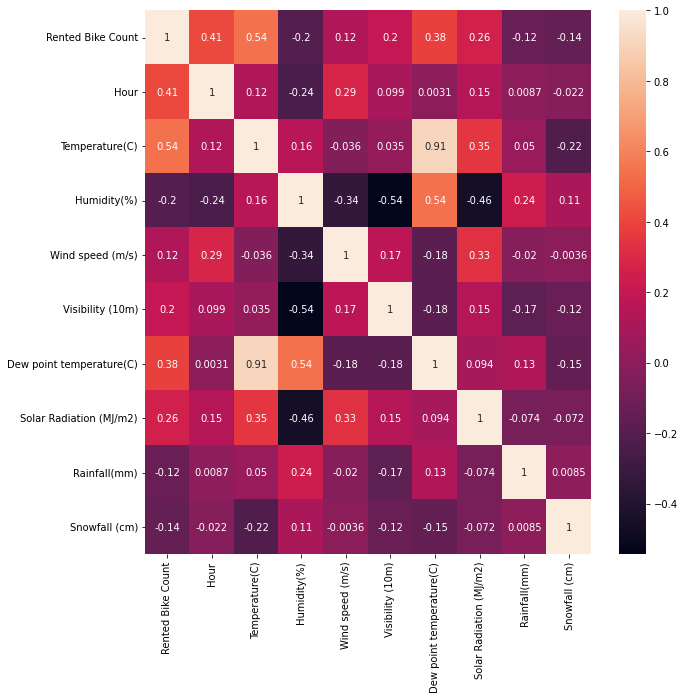

In [164]:
# Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr_data,annot=True)

**The temprature is highly corrlated with The dew temprature**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


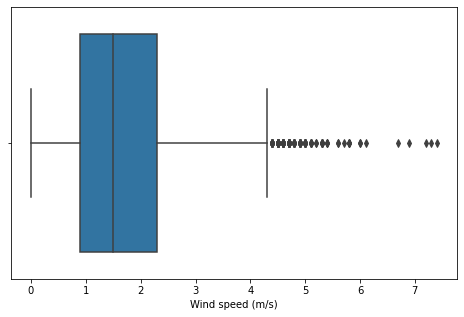

In [165]:
# Exploring the outliers
plt.figure(figsize=(8,5))
sns.boxplot(data['Wind speed (m/s)'])

In [166]:
Q1 = np.percentile(data['Wind speed (m/s)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['Wind speed (m/s)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['Wind speed (m/s)'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

low limit: -1.1999999999999997
upper limit: 4.3999999999999995


In [167]:
data=data[data['Wind speed (m/s)']> up_lim]
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
82,04/12/2017,311,10,-1.1,40,4.5,2000,-13.0,0.64,0.0,0.0,Winter,No Holiday,Yes
84,04/12/2017,393,12,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,Winter,No Holiday,Yes
85,04/12/2017,391,13,0.0,30,5.4,1938,-15.5,1.17,0.0,0.0,Winter,No Holiday,Yes
86,04/12/2017,338,14,0.1,27,4.5,2000,-16.7,1.09,0.0,0.0,Winter,No Holiday,Yes
87,04/12/2017,341,15,-0.1,25,5.8,2000,-17.8,0.88,0.0,0.0,Winter,No Holiday,Yes


In [168]:
data.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [169]:
# Label Encoding
data['Functioning Day']=data['Functioning Day'].apply(lambda x : 1 if (x =='Yes') else(0))
data['Holiday']=data['Holiday'].apply(lambda x : 1 if (x =='Holiday') else(0))
data['Seasons']=data['Seasons'].replace(['Autumn'],1)
data['Seasons']=data['Seasons'].replace(['Summer'],2)
data['Seasons']=data['Seasons'].replace(['Spring'],3)#df['season']=df['season'].replace(['summer'],3)
data['Seasons']=data['Seasons'].replace(['Winter'],4)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
82,04/12/2017,311,10,-1.1,40,4.5,2000,-13.0,0.64,0.0,0.0,4,0,1
84,04/12/2017,393,12,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,4,0,1
85,04/12/2017,391,13,0.0,30,5.4,1938,-15.5,1.17,0.0,0.0,4,0,1
86,04/12/2017,338,14,0.1,27,4.5,2000,-16.7,1.09,0.0,0.0,4,0,1
87,04/12/2017,341,15,-0.1,25,5.8,2000,-17.8,0.88,0.0,0.0,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7934,27/10/2018,1183,14,10.8,37,4.4,2000,-3.3,1.29,0.0,0.0,1,0,1
7937,27/10/2018,1176,17,9.5,34,5.7,2000,-5.6,0.45,0.0,0.0,1,0,1
7985,29/10/2018,1274,17,10.0,43,4.9,2000,-2.0,0.43,0.0,0.0,1,0,1
8242,09/11/2018,0,10,11.3,68,4.7,1984,5.5,0.44,0.0,0.0,1,0,0


In [170]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model


In [171]:
data=data.drop(['Date'],axis=1)

In [172]:
# Splitting the data
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.25)

In [173]:
train_x=train.drop(['Rented Bike Count'],axis=1)
train_y=train['Rented Bike Count']

test_x=test.drop(['Rented Bike Count'],axis=1)
test_y=test['Rented Bike Count']

In [174]:
# TRAINING THE MODEL
regr = linear_model.LinearRegression()
fitregr=regr.fit(train_x,train_y)
pred=fitregr.predict(train_x)
prdet=fitregr.predict(test_x)

In [177]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
train_set_r2= r2_score(train_y,pred)
print('R2 score for the train set',train_set_r2)
test_set_r2 = r2_score(test_y,prdet)
print(' R2 test score is : {}'.format(test_set_r2))

R2 score for the train set 0.7360227977552034
 R2 test score is : 0.5826119146592045
